#RFM Project
**RFM** is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

1. Recency – How recently did the customer purchase?
2. Frequency – How often do they purchase?
3. Monetary Value – How much do they spend?


Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.
1. Platinum customer - frequent and more revenue generator.
2. Gold customer - frequent but less revenue generator.
3. silver customer - less frequent and less revenue generator.




In [27]:
#import package
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-04-08 09:23:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.64.101, 173.194.64.139, 173.194.64.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.64.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-08 09:23:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  56.7MB/s    in 0.3s    

2025-04-08 09:2

In [28]:
#import package
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#pandas disply settings
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.float_format', lambda x: '%.1f' % x)  # set float format

In [30]:
import gdown
import io
def load_from_drive(file_id, file_type, encoding='utf-8'):
    # download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # name for downloaded file
    output = f'downloaded_file.{file_type}'

    # download
    gdown.download(download_url, output, quiet=False)

    # file type selection
    if file_type == 'csv':
        data = pd.read_csv(output, encoding = encoding)  # csv file
    elif file_type == 'xlsx':
        data = pd.read_excel(output)  # Excel file
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'xlsx'.")

    return data

file_id = '1usvxPFxXf_Fgvf1EguG5I6IY_H8dVPaZ'
file_type = 'csv'
df = load_from_drive(file_id, file_type, encoding = 'ISO-8859-1')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1usvxPFxXf_Fgvf1EguG5I6IY_H8dVPaZ
To: /content/downloaded_file.csv
100%|██████████| 45.6M/45.6M [00:00<00:00, 80.6MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.4,17850.0,United Kingdom


##General Data Analysis

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


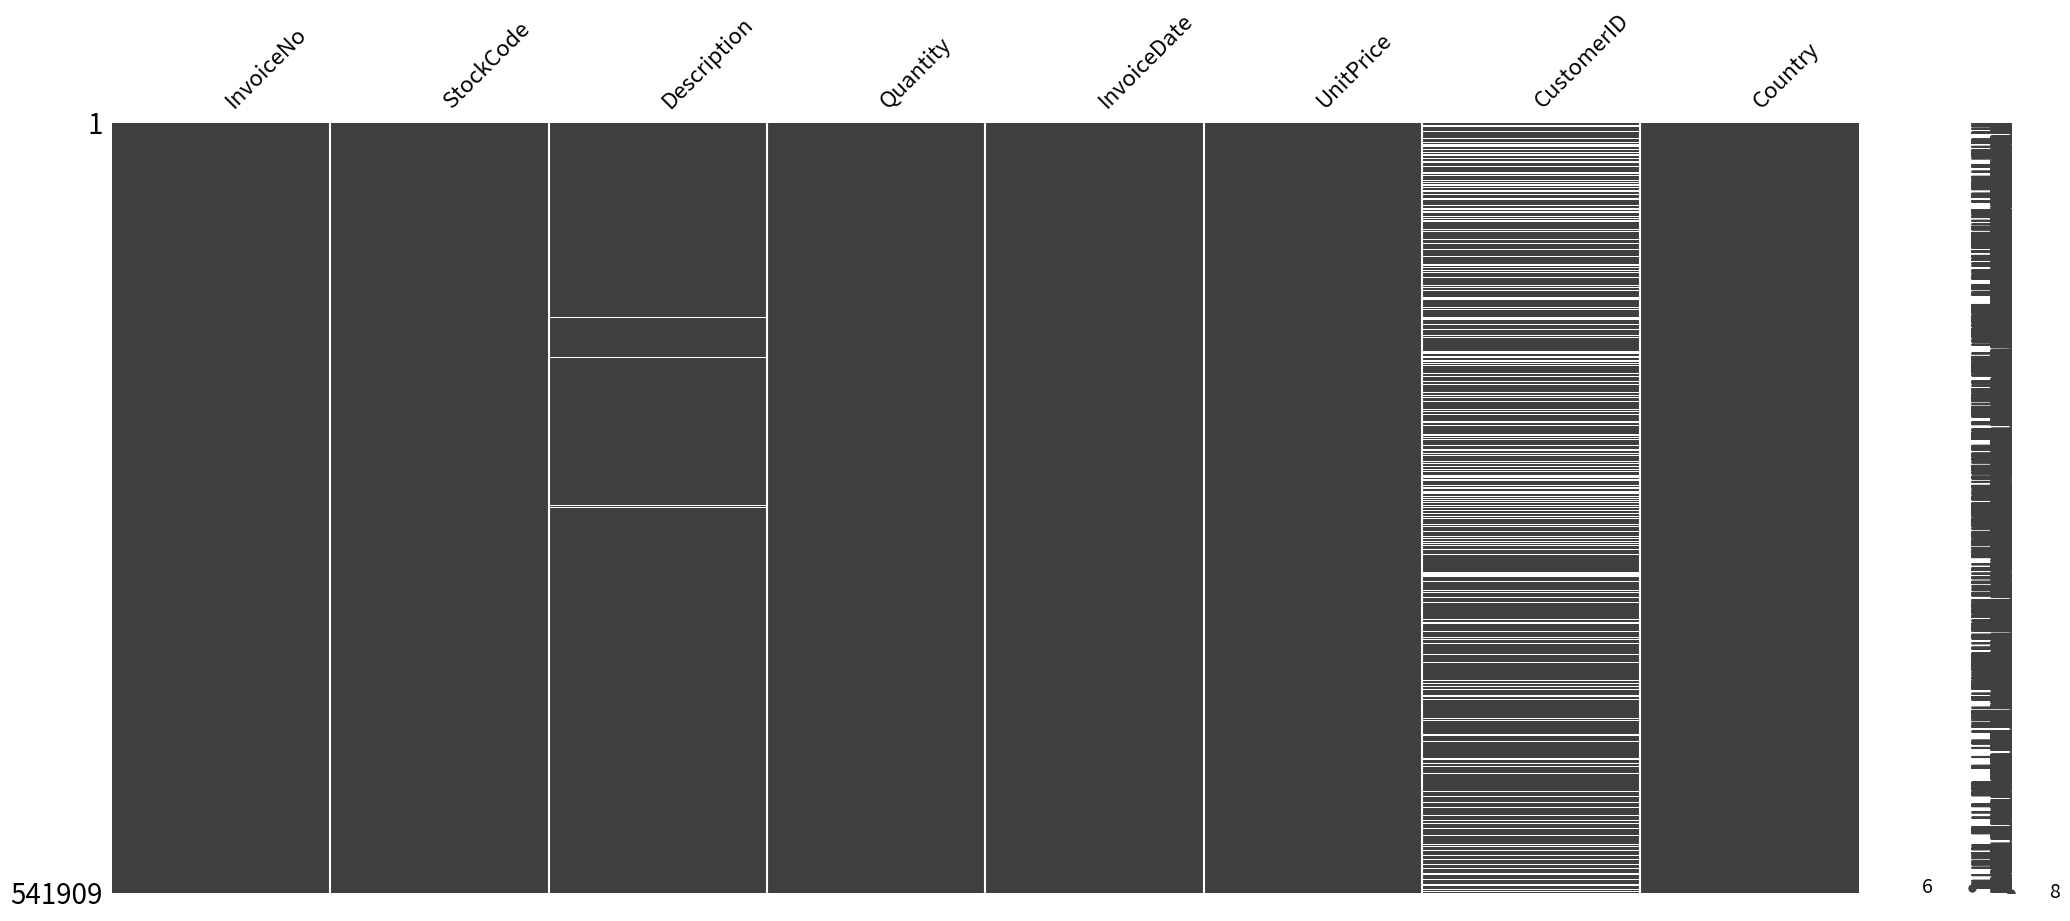

In [33]:
import missingno as msno
msno.matrix(df)
plt.show()

In [34]:
#drop data with no CustomerID
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [35]:
#change column names to all lower case
df.columns = df.columns.str.lower()

In [36]:
#Count unique countries
df['country'].nunique()

37

In [37]:
#Top 10 countries with most customer info
df['country'].value_counts()[:10].index.tolist()

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

In [38]:
#Top 5 most expensive product
df.sort_values(by='unitprice', ascending=False).head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.8,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.8,16029.0,United Kingdom
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.0,16029.0,United Kingdom
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.6,17448.0,United Kingdom


In [39]:
#Top 5 most selling PRODUCT
df.groupby(["stockcode","description"]).agg({"quantity": lambda x: x.sum()})\
              .rename({'quantity':'total_quantity'},axis=1).nlargest(5,'total_quantity')

,,total_quantity
stockcode,description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409


In [40]:
#drop all missing values
df = df.dropna()

In [41]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,406829.0,12.1,248.7,-80995.0,-2.0,1.0,1.0,2.0,5.0,12.0,24.0,36.0,120.0,80995.0
unitprice,406829.0,3.5,69.3,0.0,0.2,0.4,0.6,1.2,1.9,3.8,6.8,8.5,15.0,38970.0
customerid,406829.0,15287.7,1713.6,12346.0,12415.0,12626.0,12876.0,13953.0,15152.0,16791.0,17719.0,17905.0,18212.0,18287.0


In [42]:
#quantity has negative value because of refund, caused by invoiceno start with C
df = df[~df["invoiceno"].str.contains("C", na=False)]

In [43]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,397924.0,13.0,180.4,1.0,1.0,1.0,1.0,2.0,6.0,12.0,24.0,36.0,120.0,80995.0
unitprice,397924.0,3.1,22.1,0.0,0.2,0.4,0.6,1.2,1.9,3.8,6.3,8.5,14.9,8142.8
customerid,397924.0,15294.3,1713.2,12346.0,12415.0,12627.0,12883.0,13969.0,15159.0,16795.0,17725.0,17912.0,18211.0,18287.0


In [44]:
#exclude abnormal value
df = df.query('quantity>0 and unitprice>0')

In [45]:
#change invoiced date into Y/M/D format
df['invoicedate'] = pd.to_datetime(df['invoicedate'].str.split(' ',expand=True).iloc[:,0])
df['invoicedate']

,invoicedate
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01
...,...
541904,2011-12-09
541905,2011-12-09
541906,2011-12-09
541907,2011-12-09


In [46]:
#add fields for grouping
df['year'] = df.invoicedate.dt.year
df['month'] = df.invoicedate.dt.month
df['months'] = df.year.astype(str) + '-' + df.month.astype(str)
df['totalcost'] =  df['unitprice'] * df['quantity']
df.dtypes

,0
invoiceno,object
stockcode,object
description,object
quantity,int64
invoicedate,datetime64[ns]
unitprice,float64
customerid,float64
country,object
year,int32
month,int32


In [47]:
df['customerid'] = df['customerid'].astype(int)
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,year,month,months,totalcost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.5,17850,United Kingdom,2010,12,2010-12,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.4,17850,United Kingdom,2010,12,2010-12,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.8,17850,United Kingdom,2010,12,2010-12,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.4,17850,United Kingdom,2010,12,2010-12,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.4,17850,United Kingdom,2010,12,2010-12,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.8,12680,France,2011,12,2011-12,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.1,12680,France,2011,12,2011-12,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.2,12680,France,2011,12,2011-12,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.2,12680,France,2011,12,2011-12,16.6


In [48]:
# Create an RFM table using pivot_table on the DataFrame
rfm = df.pivot_table(
    index='customerid',               # Set 'customerid' as the index, one row per customer
    values=["invoiceno", "totalcost", "invoicedate"],  # Columns to aggregate
    aggfunc={
        "invoiceno": pd.Series.nunique,   # Use pd.Series.nunique to count unique invoice numbers per customer (Frequency)
        "totalcost": 'sum',               # Use 'sum' to calculate the total spending (Monetary)
        "invoicedate": 'max'              # Use 'max' to get the most recent purchase date (Recency)
    }
)


1. `df.pivot_table(...)`:
This method reshapes the DataFrame using pivoting, reorganizing the data so that each row represents a customer, using customerid as the index.

2. `index = customerid`:
By setting the index to "customerid", we ensure that each customer corresponds to one row in the resulting pivot table.

3. `values=['invoiceno', 'totalcost', 'invoicedate']`:
These are the columns we want to aggregate — including the invoice number (invoiceno), total cost (totalcost), and the latest purchase date (invoicedate).

4. `aggfunc={...}`:
In the `aggfunc` parameter, we define the aggregation functions for each customer:
  -  `"invoiceno"`: pd.Series.nunique: Counts the number of unique invoices per customer. This represents Frequency.

  -  `"totalcost" : 'sum'`: Calculates the total spending of each customer. This is the Monetary value.

  - `"invoicedate": 'max'`: Finds the most recent purchase date for each customer. This is used for Recency.

5. Result:
The resulting `rfm` table contains the RFM metrics for each customer — where each row is one customer, and the columns include:

  - the count of unique invoices (F),

  - total amount spent (M), and

  - the latest purchase date (R).

  This RFM analysis can be used for customer segmentation and personalized marketing.



In [49]:
# Use the most recent invoice date as a reference, and calculate the number of days since each customer's last purchase (Recency)
rfm['Recency'] = (rfm.invoicedate.max() - rfm.invoicedate) / np.timedelta64(1, 'D')

# Rename columns: total number of invoices as Frequency, total spending as Monetary
rfm.rename(columns={
    "invoiceno": "Frequency",
    "totalcost": "Monetary"
}, inplace=True)

rfm.head()

,invoicedate,Frequency,Monetary,Recency
customerid,,,,
12346,2011-01-18,1,77183.6,325.0
12347,2011-12-07,7,4310.0,2.0
12348,2011-09-25,4,1797.2,75.0
12349,2011-11-21,1,1757.5,18.0
12350,2011-02-02,1,334.4,310.0


In [51]:
# Compare values to the mean — assign 1 if greater than the mean, otherwise 0
rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std())

def rfm_func(x):
    level = x.apply(lambda x: '1' if x > 0 else '0')
    level = level.Recency + level.Frequency + level.Monetary
    d = {
        "111": "Important Value User",
        "011": "Important to Retention User",
        "101": "Important to Keep User",
        "001": "Important Development User",
        "110": "General Value User",
        "010": "General to Retention User",
        "100": "General to Keep User",
        "000": "General Development User"
    }
    result = d[level]
    return result


# Assign RFM segment labels to customers
rfm['label'] = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std()).apply(rfm_func, axis=1)

rfm.head()


,invoicedate,Frequency,Monetary,Recency,label
customerid,,,,,
12346,2011-01-18,1,77183.6,325.0,Important to Keep User
12347,2011-12-07,7,4310.0,2.0,Important to Retention User
12348,2011-09-25,4,1797.2,75.0,General Development User
12349,2011-11-21,1,1757.5,18.0,General Development User
12350,2011-02-02,1,334.4,310.0,General to Keep User


<Axes: xlabel='Frequency', ylabel='Recency'>

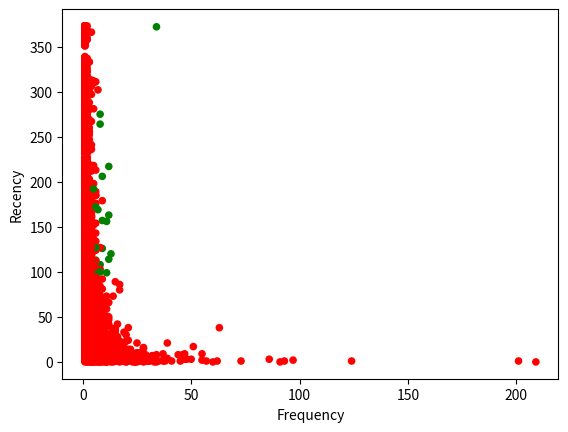

In [52]:
# In the rfm DataFrame, if the customer label is "Important Value User", set the "color" column to green ("g")
rfm.loc[rfm.label == "Important Value User", "color"] = "g"

# For all other customers, set the "color" column to red ("r")
rfm.loc[rfm.label != "Important Value User", "color"] = "r"

# Create a scatter plot of 'Frequency' vs. 'Recency', using the 'color' column to color the points
rfm.plot.scatter("Frequency", "Recency", c=rfm.color)

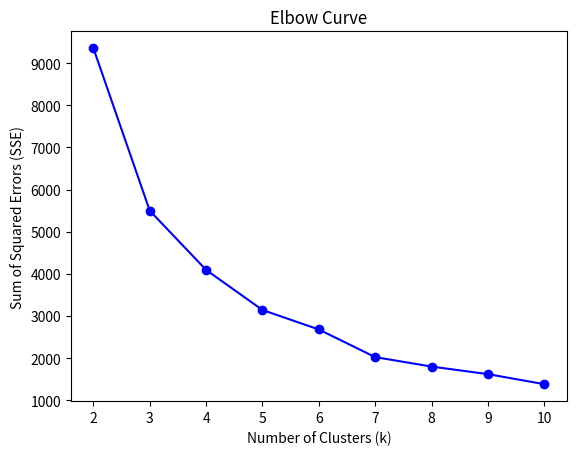

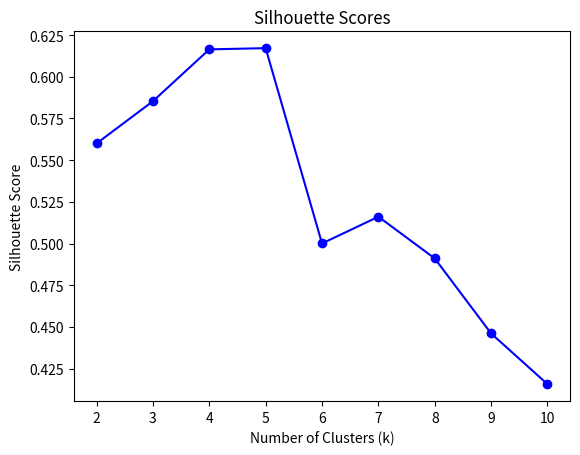

In [53]:
#kmeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 完全使用原始的特征，试一下kmeans
# rfm的基础上，再去加一些新的feat

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

# Determine the optimal value of k using the elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

X = rfm_segmentation.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


# kmeans++
#for k in k_values:
#    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#    kmeans.fit(X)


# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

Using the RFM model to identify different customer segments allows businesses to evaluate customer value and profitability. It enables the delivery of personalized communication and marketing services, provides strong support for more informed marketing decisions, and ultimately helps generate greater benefits for the company.

In [54]:
# Perform KMeans clustering: divide the data into 3 clusters, with random seed set to 0
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

# Create a new column 'cluster' that contains the cluster label assigned to each row
rfm_segmentation['cluster'] = kmeans.labels_

# Validate our assumption: display the first 10 rows belonging to cluster 0
rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
customerid,,,,
12347,2.0,7,4310.0,0
12348,75.0,4,1797.2,0
12349,18.0,1,1757.5,0
12350,310.0,1,334.4,0
12352,36.0,8,2506.0,0
12353,204.0,1,89.0,0
12354,232.0,1,1079.4,0
12355,214.0,1,459.4,0
12356,22.0,3,2811.4,0


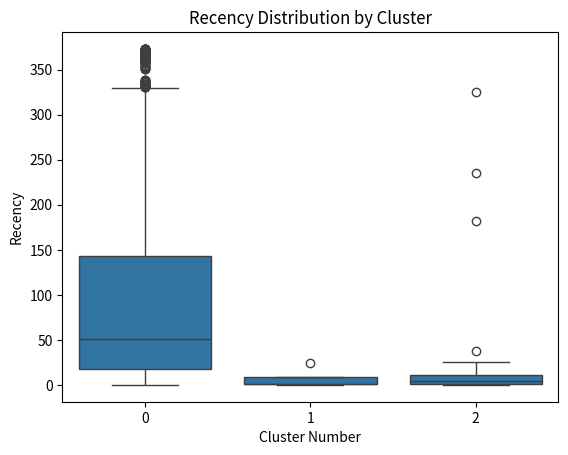

In [55]:
# Visualize the distribution of Recency across different clusters using a boxplot
# x-axis: cluster number, y-axis: Recency value
sns.boxplot(x=rfm_segmentation.cluster, y=rfm_segmentation.Recency)

# Add annotations to explain the characteristics of each cluster
plt.title("Recency Distribution by Cluster")   # Chart title
plt.xlabel("Cluster Number")                   # X-axis label: cluster number
plt.ylabel("Recency")                          # Y-axis label: Recency (days since last purchase)
plt.show()                                     # Display the plot

cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.

<Axes: xlabel='cluster', ylabel='Frequency'>

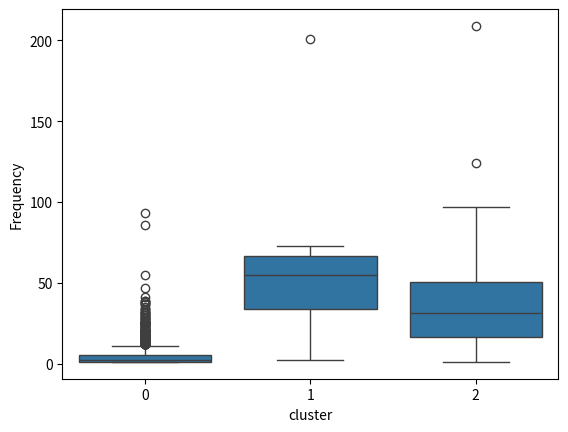

In [56]:
sns.boxplot(x=rfm_segmentation.cluster,y=rfm_segmentation.Frequency)

<Axes: xlabel='cluster', ylabel='Monetary'>

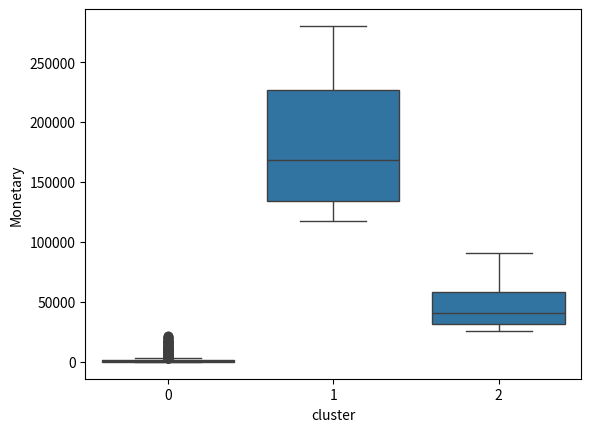

In [57]:
sns.boxplot(x=rfm_segmentation.cluster,y=rfm_segmentation.Monetary)

Based on customer Segmentation we found out cluster 1 is Platinum customers Cluster 2 is Gold Customers Cluster 0 is Silver Customers

In [58]:
# Calculate R-Score (Recency Score) — rates how recently a customer made a purchase
# Parameter x: the value to score (Recency)
# Parameter p: the key used for quartile lookup (e.g., 'recency', 'monetary_value', 'frequency')
# Parameter d: a dictionary containing quartile values
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Calculate F-Score and M-Score (Frequency and Monetary Score)
# Parameter x: the value to score (Frequency or Monetary)
# Parameter p: the key used for quartile lookup
# Parameter d: a dictionary containing quartile values
# Higher Frequency and Monetary values indicate better customers, so scores are reversed (1 = best)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [61]:
# Calculate the quartiles (25%, 50% (median), and 75%) for each metric in the RFM DataFrame
quantile = rfm[['Frequency','Monetary','Recency']].quantile(q=[0.25,0.5,0.75])
quantile

,Frequency,Monetary,Recency
0.2,1.0,307.4,17.0
0.5,2.0,674.5,50.0
0.8,5.0,1661.7,141.8


quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25%
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75%
values.

In [62]:
# Calculate the R-Quartile score (Recency score) for each customer and store it in the 'R_Quartile' column
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency', quantile))

# Calculate the F-Quartile score (Frequency score) for each customer and store it in the 'F_Quartile' column
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency', quantile))

# Calculate the M-Quartile score (Monetary score) for each customer and store it in the 'M_Quartile' column
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary', quantile))


In [63]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
customerid,,,,,,,,
12346,325.0,1,77183.6,2,4,4,1,441
12347,2.0,7,4310.0,0,1,1,1,111
12348,75.0,4,1797.2,0,3,2,1,321
12349,18.0,1,1757.5,0,2,4,1,241
12350,310.0,1,334.4,0,4,4,3,443


In [67]:
# Calculate the sum of R_Quartile, F_Quartile, and M_Quartile scores
# and store the result in a new column called 'Total_score'
rfm_segmentation['Total_score'] = (
    rfm_segmentation['R_Quartile'] +
    rfm_segmentation['F_Quartile'] +
    rfm_segmentation['M_Quartile']
)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,
12346,325.0,1,77183.6,2,4,4,1,441,9
12347,2.0,7,4310.0,0,1,1,1,111,3
12348,75.0,4,1797.2,0,3,2,1,321,6
12349,18.0,1,1757.5,0,2,4,1,241,7
12350,310.0,1,334.4,0,4,4,3,443,11


Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score
between 3 and 12. Here the advantage is that each of the scores got same importance. However some scores
will have many segments as constituents (eg - 413 ad 431)

In [68]:
print("Best Customers: ", len(rfm_segmentation[rfm_segmentation['RFMScore'] == '111']))
print('Loyal Customers: ', len(rfm_segmentation[rfm_segmentation['F_Quartile'] == 1]))
print("Big Spenders: ", len(rfm_segmentation[rfm_segmentation['M_Quartile'] == 1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore'] == '134']))
print('Lost Customers: ', len(rfm_segmentation[rfm_segmentation['RFMScore'] == '344']))
print('Lost Cheap Customers: ', len(rfm_segmentation[rfm_segmentation['RFMScore'] == '444']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  34
Lost Customers:  208
Lost Cheap Customers:  444


## 📊 RFM-Based Customer Segmentation

This section classifies customers based on their **Recency, Frequency, and Monetary** scores using the RFM model.

We assign each customer a 3-digit RFM score (e.g., `111`, `344`, etc.) based on quartiles:

- **R_Quartile**: Recency score (1 = recent, 4 = old)
- **F_Quartile**: Frequency score (1 = frequent, 4 = rare)
- **M_Quartile**: Monetary score (1 = high spender, 4 = low spender)

### 🎯 Segmentation Rules:

| RFM Score | Segment Name           | Description                                           |
|-----------|------------------------|-------------------------------------------------------|
| `111`     | Best Customers         | Recent, frequent, and high spenders                   |
| `134`     | Almost Lost            | Not recent, but still valuable in past behavior       |
| `344`     | Lost Customers         | Haven't bought in a long time and spent little        |
| `444`     | Lost Cheap Customers   | Inactive and not valuable                             |
| F = 1     | Loyal Customers        | Purchase very frequently                              |
| M = 1     | Big Spenders           | Spend large amounts                                   |
| others    | Others                 | All remaining customers not matching above conditions |

Each customer is tagged with a **Segment** label, which can be used for:
- Targeted marketing
- Retention strategies
- VIP promotions
- Churn reactivation campaigns


In [69]:
# Sort the rfm_segmentation DataFrame first by 'RFMScore' in ascending order,
# then by 'Monetary' in descending order
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,
14646,1.0,73,280206.0,1,1,1,1,111,3
18102,0.0,60,259657.3,1,1,1,1,111,3
17450,8.0,46,194550.8,1,1,1,1,111,3
14911,1.0,201,143825.1,1,1,1,1,111,3
14156,9.0,55,117379.6,1,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17102,261.0,1,25.5,0,4,4,4,444,12
15823,372.0,1,15.0,0,4,4,4,444,12
17763,263.0,1,15.0,0,4,4,4,444,12


In [70]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

,Monetary
RFMScore,
111,9547.5
112,1286.3
113,511.3
114,253.9
121,2910.6
...,...
434,214.6
441,8910.3
442,994.8


In [71]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

,Monetary
Total_score,
3,9547.5
4,4164.1
5,2431.4
6,1456.7
7,1201.3
8,782.7
9,718.0
10,384.8
11,288.1


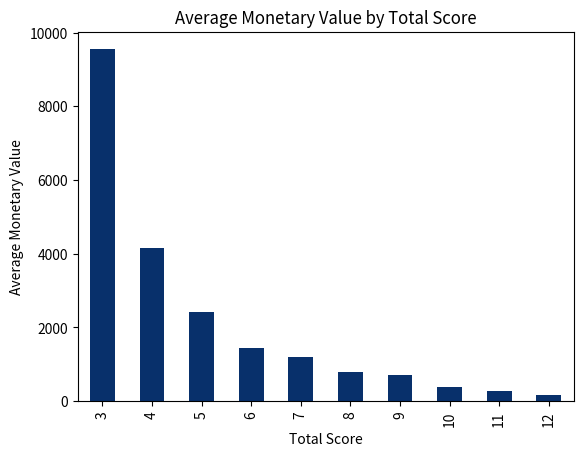

In [72]:
# Group by Total_score and calculate the average Monetary value for each score group,
# then plot the results as a bar chart
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

# Add title and axis labels
plt.title('Average Monetary Value by Total Score')   # Chart title
plt.xlabel('Total Score')                 # X-axis label
plt.ylabel('Average Monetary Value')           # Y-axis label
plt.show()                         # Display the chart

Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.

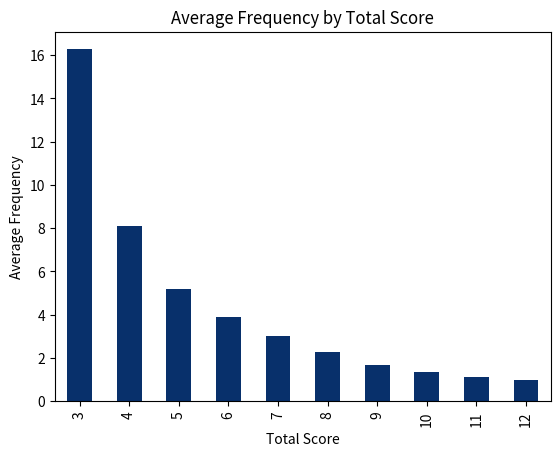

In [73]:
# Group by Total_score and calculate the average Frequency for each score group,
# then plot the results as a bar chart
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

# Add chart title and axis labels
plt.title('Average Frequency by Total Score')   # Chart title
plt.xlabel('Total Score')               # X-axis label
plt.ylabel('Average Frequency')            # Y-axis label
plt.show()                       # Display the chart


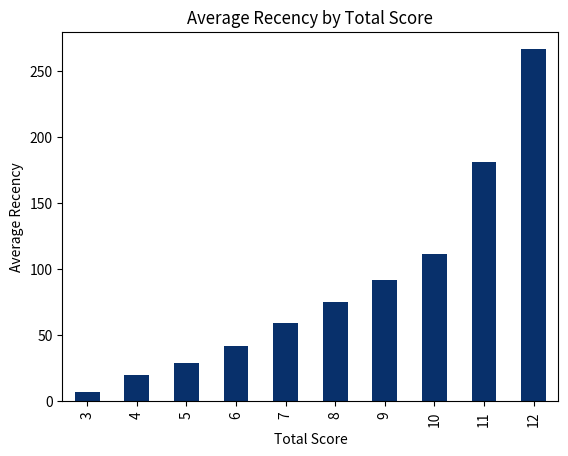

In [74]:
# Group by Total_score and calculate the average Recency for each score group,
# then plot the results as a bar chart
rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

# Add chart title and axis labels
plt.title('Average Recency by Total Score')     # Chart title
plt.xlabel('Total Score')                       # X-axis label
plt.ylabel('Average Recency')                   # Y-axis label (Average days since last purchase)
plt.show()                                      # Display the chart

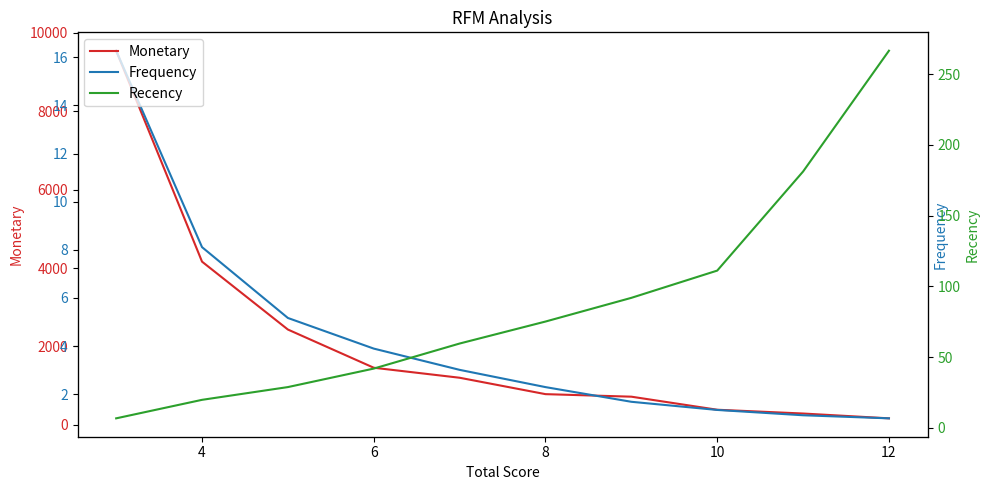

In [78]:
# Group by Total_score and calculate the average Monetary, Frequency, and Recency for each group
m = rfm_segmentation.groupby('Total_score')['Monetary'].mean()
f = rfm_segmentation.groupby('Total_score')['Frequency'].mean()
r = rfm_segmentation.groupby('Total_score')['Recency'].mean()

# Create a figure with multiple axes and set the figure size
fig, ax1 = plt.subplots(figsize=[10, 5])

# Disable gridlines for the first axis
ax1.grid(False)

# Plot average Monetary as a line chart on the first y-axis (left)
color = 'tab:red'
ax1.plot(m.index, m.values, color=color, label='Monetary')
ax1.set_title('RFM Analysis')                    # Chart title
ax1.set_xlabel('Total Score')                    # X-axis label
ax1.set_ylabel('Monetary', color=color)          # Y-axis label (left)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (right) to plot average Frequency
ax2 = ax1.twinx()
ax2.grid(False)

color = 'tab:blue'
ax2.plot(f.index, f.values, color=color, label='Frequency')
ax2.set_ylabel('Frequency', color=color)         # Y-axis label (right)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis (right side, offset) to plot average Recency
ax3 = ax2.twinx()
ax3.grid(False)

color = 'tab:green'
ax3.plot(r.index, r.values, color=color, label='Recency')
ax3.set_ylabel('Recency', color=color)           # Y-axis label (right 2)
ax3.tick_params(axis='y', labelcolor=color)

# Combine legends from all three axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='best')

# Adjust layout to prevent label overlap
fig.tight_layout()

# Display the final chart
plt.show()